In [2]:
import sys
from pathlib import Path
sys.path.append(Path().absolute())

In [3]:
from item_based_recommender import ItemBasedRecommender, load_data
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [4]:
train_data, test_data, validation_data = load_data()

100 components:
  explained variance = 0.18435014044214285
  mapk on train data 0.10754280829665397
  mapk on validation data 0.006820886938998394
  mapk on test data 0.03410335551384774
200 components:
  explained variance = 0.25250496388883403
  mapk on train data 0.21328698895084452
  mapk on validation data 0.00623413773189315
  mapk on test data 0.056325814984829255
500 components:
  explained variance = 0.3732448488489145
  mapk on train data 0.43267215338558124
  mapk on validation data 0.009727514862254283
  mapk on test data 0.11394629248102543
1000 components:
  explained variance = 0.4860676706008714
  mapk on train data 0.6298627669810279
  mapk on validation data 0.010525327816891283
  mapk on test data 0.12423077886807064
2000 components:
  explained variance = 0.6147765978009663
  mapk on train data 0.8154144136547943
  mapk on validation data 0.015386636963480409
  mapk on test data 0.16308892586413926


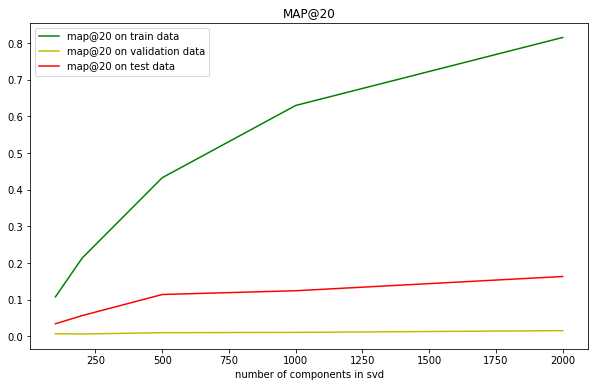

In [5]:
recommender = ItemBasedRecommender(train_data, test_data, validation_data)
components = [100, 200, 500, 1000, 2000]
train = []
validation = []
test = []

for comp_num in components:
    print(str(comp_num) + ' components:')
    recommender.fit(comp_num, 'svd-' + str(comp_num) + '.pickle')
    print('  explained variance = ' + str(recommender.explained_variance))
    predicted = recommender.predict_for_top_n_users(20)
    train_mapk, validation_mapk, test_mapk = recommender.get_mapk(predicted, 20)
    print('  mapk on train data ' + str(train_mapk))
    print('  mapk on validation data ' + str(validation_mapk))
    print('  mapk on test data ' + str(test_mapk))
    
    train.append(train_mapk)
    validation.append(validation_mapk)
    test.append(test_mapk)

plt.figure(figsize=(10, 6))
plt.plot(components, train, label='map@20 on train data', c='g')
plt.plot(components, validation, label='map@20 on validation data', c='y')
plt.plot(components, test, label='map@20 on test data', c='r')
plt.legend(loc='upper left')
plt.title('MAP@20')
plt.xlabel('number of components in svd')
plt.show()

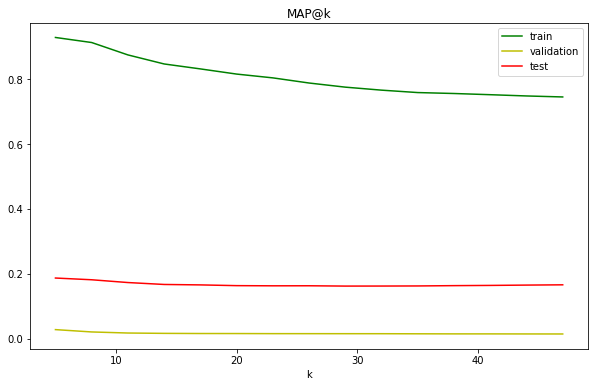

In [6]:
predicted = recommender.predict_for_top_n_users(50)
train_values = []
validation_values = []
test_values = []
for k in range(5, 50, 3):
    train_mapk, validation_mapk, test_mapk = recommender.get_mapk(predicted, k)
    train_values.append(train_mapk)
    validation_values.append(validation_mapk)
    test_values.append(test_mapk)
plt.figure(figsize=(10, 6))
plt.plot(range(5, 50, 3), train_values, label='train', c='g')
plt.plot(range(5, 50, 3), validation_values, label='validation', c='y')
plt.plot(range(5, 50, 3), test_values, label='test', c='r')
plt.legend(loc='upper right')
plt.title('MAP@k')
plt.xlabel('k')
plt.show()

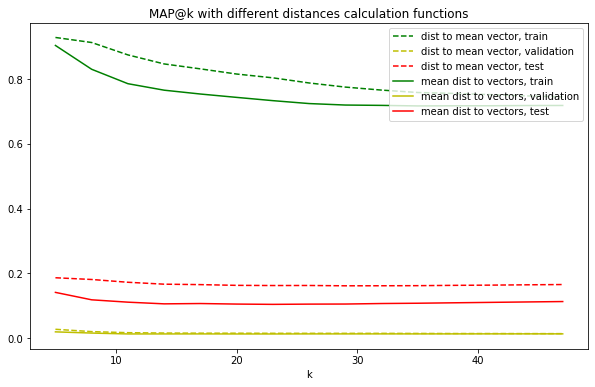

In [7]:
plt.figure(figsize=(10, 6))

train_values = []
validation_values = []
test_values = []
recommender.set_distances_calculation_function(recommender.distances_to_mean_vector)
predicted = recommender.predict_for_top_n_users(50)
for k in range(5, 50, 3):
    train_mapk, validation_mapk, test_mapk = recommender.get_mapk(predicted, k)
    train_values.append(train_mapk)
    validation_values.append(validation_mapk)
    test_values.append(test_mapk)
plt.plot(range(5, 50, 3), train_values, label='dist to mean vector, train', c='g', linestyle='dashed')
plt.plot(range(5, 50, 3), validation_values, label='dist to mean vector, validation', c='y', linestyle='dashed')
plt.plot(range(5, 50, 3), test_values, label='dist to mean vector, test', c='r', linestyle='dashed')

train_values = []
validation_values = []
test_values = []
recommender.set_distances_calculation_function(recommender.mean_distances_to_vectors)
predicted = recommender.predict_for_top_n_users(50)
for k in range(5, 50, 3):
    train_mapk, validation_mapk, test_mapk = recommender.get_mapk(predicted, k)
    train_values.append(train_mapk)
    validation_values.append(validation_mapk)
    test_values.append(test_mapk)
plt.plot(range(5, 50, 3), train_values, label='mean dist to vectors, train', c='g')
plt.plot(range(5, 50, 3), validation_values, label='mean dist to vectors, validation', c='y')
plt.plot(range(5, 50, 3), test_values, label='mean dist to vectors, test', c='r')

plt.legend(loc='upper right')
plt.title('MAP@k with different distances calculation functions')
plt.xlabel('k')
plt.show()

In [8]:
user_id = 123
predicted = recommender.predict_for_user(user_id, 20)
actual = np.array(train_data[user_id])
hits = np.intersect1d(predicted, actual)
products = pd.read_csv('products.csv')
predicted = list(products[products['product_id'].isin(predicted)]['product_name'])
actual = list(products[products['product_id'].isin(actual)]['product_name'])
hits = list(products[products['product_id'].isin(hits)]['product_name'])
print('Recommendations:')
print(*predicted, sep='\n')
print('\nActual:')
print(*actual, sep='\n')
print('\nHits:')
print(*hits, sep='\n')

Recommendations:
Organic Black Seedless Grapes
Dark Chocolate Almondmilk
Organic Kidney Beans
Organic Marinara Sauce
Sprouted Whole Wheat Bread
Organic Whole Milk Yogurt
Artichoke Parmesan Dip
Organic Medium Chili
Organic Plain Yogurt
Bean & Cheese Burrito
Boudin Sliced Sourdough Round
Teriyaki & Pineapple Chicken Meatballs
Organic Triple Berry Blend
Breakfast Patties
Organic Avocados Hass Variety
Tikka Masala
Parmesan Crisps
Organic Whole Pineapple
Ibuprofen
Organic Limes

Actual:
Shredded Mexican Blend Cheese
Hass Avocados
Sprouted Whole Wheat Bread
Corn Tortillas
Unsweetened Vanilla Almond Breeze
Organic Medium Chili
Organic Plain Yogurt
Bean & Cheese Burrito
Teriyaki & Pineapple Chicken Meatballs
Creamy Almond Butter
Organic Tortilla Chips
Sweet Kale Salad Mix
Organic Avocados Hass Variety
French Roast Whole Bean Coffee
Sweet & Salty Nut Granola Bars Peanut

Hits:
Sprouted Whole Wheat Bread
Organic Medium Chili
Organic Plain Yogurt
Bean & Cheese Burrito
Teriyaki & Pineapple Chicken

In [12]:
recommender = ItemBasedRecommender(train_data, test_data, validation_data)
recommender.set_svd('svd-2000.pickle')
products = pd.read_csv('products.csv')

print('  Prediction for user')
actual = list(products[products['product_id'].isin(train_data[6])]['product_name'])
print(' actual items for user_id=6:')
print(*actual, sep='\n')
predicted_ids = recommender.predict_for_user(6, 5)
predicted = list(products[products['product_id'].isin(predicted_ids)]['product_name'])
print(' predicted:')
print(*predicted, sep='\n')

items = [38293, 20323, 40992, 21903, 45007]
print('\n  Prediction on items list')
actual = list(products[products['product_id'].isin(items)]['product_name'])
print(' actual items:')
print(*actual, sep='\n')
predicted_ids = recommender.predict_on_items(items, 5)
predicted = list(products[products['product_id'].isin(predicted_ids)]['product_name'])
print(' predicted:')
print(*predicted, sep='\n')

  Prediction for user
 actual items for user_id=6:
Italian Extra Virgin Olive Oil
Medium Cheddar Cheese Block
Strained Tomatoes
Organic Baby Spinach
Organic Lacinato (Dinosaur) Kale
Ground Turkey Breast
Chopped Tomatoes
Organic Zucchini
Organic Garnet Sweet Potato (Yam)
 predicted:
Organic Baby Spinach
Organic Lacinato (Dinosaur) Kale
Chopped Tomatoes
Organic Zucchini
Organic Garnet Sweet Potato (Yam)

  Prediction on items list
 actual items:
Strained Tomatoes
Organic Baby Spinach
Ground Turkey Breast
Chopped Tomatoes
Organic Zucchini
 predicted:
Strained Tomatoes
Organic Baby Spinach
Ground Turkey Breast
Chopped Tomatoes
Organic Zucchini
